## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousemerge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mousemerge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking to see what the data looks like
#mousemerge["Mouse ID"].unique() #no anomalies spotted
#mousemerge["Drug Regimen"].unique() #no anomalies spotted
#mousemerge["Sex"].unique() #no anomalies spotted
#mousemerge["Age_months"].unique() #no anomalies spotted
#mousemerge["Weight (g)"].unique() #no anomalies spotted
#mousemerge["Timepoint"].unique() #no anomalies spotted
#mousemerge["Tumor Volume (mm3)"].unique() #no anomalies spotted
#mousemerge["Metastatic Sites"].unique() #no anomalies spotted

In [3]:
# Checking the number of mice.
[mouse_metadata["Mouse ID"].count(), mousemerge["Mouse ID"].nunique()]
print(f"The number of mice is {mousemerge['Mouse ID'].nunique()}.")

The number of mice is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

dupmouse = mousemerge[["Mouse ID","Timepoint"]].loc[mousemerge[["Mouse ID","Timepoint"]].duplicated()]
dupmouse_list = [mouse for mouse in dupmouse["Mouse ID"].unique()]

print(f"The following mice have duplicated observation rows for the same time point:{dupmouse_list}")


The following mice have duplicated observation rows for the same time point:['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouse_df = mousemerge.loc[mousemerge["Mouse ID"]=="g989",:]
print(f"There are {len(dupmouse_df['Mouse ID'])} rows for mouse ID g989.")
dupmouse_df

There are 13 rows for mouse ID g989.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousemerge_clean=mousemerge.drop_duplicates()

In [7]:
# Checking the number of mice in the clean DataFrame.
g989check_df= mousemerge_clean.loc[mousemerge_clean["Mouse ID"]=="g989",:]
print(f"There are {len(g989check_df['Mouse ID'])} rows for mouse ID g989, indicating only one exact duplicate was dropped. Remaining rows appear to differ on observed fields other than Mouse ID and Timepoint (eg. Tumor Vol, Metastic Sites). May need to consider dropping entire mouse, just observations duplicated by timepoint, and/or obtain information/clearance to revise. May interfere with analysis.")
g989check_df

There are 12 rows for mouse ID g989, indicating only one exact duplicate was dropped. Remaining rows appear to differ on observed fields other than Mouse ID and Timepoint (eg. Tumor Vol, Metastic Sites). May need to consider dropping entire mouse, just observations duplicated by timepoint, and/or obtain information/clearance to revise. May interfere with analysis.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_grp = mousemerge_clean.groupby("Drug Regimen")
regimen_grp_df = {"Mean": regimen_grp["Tumor Volume (mm3)"].mean(),
                  "Median": regimen_grp["Tumor Volume (mm3)"].median(),
                  "Variance": regimen_grp["Tumor Volume (mm3)"].var(),
                  "Standard Deviation": regimen_grp["Tumor Volume (mm3)"].std(),
                  "SEM": regimen_grp["Tumor Volume (mm3)"].sem()} # sample size is drug group size, compared to overall mean.
regimen_grp_df = pd.DataFrame(regimen_grp_df)
regimen_grp_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_grp_df_agg = regimen_grp["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_grp_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Counts'>

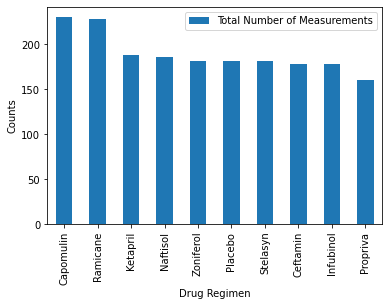

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Note: Direction above is ambiguous as it could mean each row, or each row and each column. 
#Plotting number of rows per drug.
regimen_bar = mousemerge_clean.groupby("Drug Regimen")
regimen_bar_df = pd.DataFrame({"Total Number of Measurements": regimen_bar["Tumor Volume (mm3)"].count()}).sort_values(by = "Total Number of Measurements", ascending = False)
regimen_bar_df.plot(y="Total Number of Measurements", ylabel="Counts", kind = 'bar')

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
